In [1]:
# Standard libraries
import numpy as np

# Scikit-learn libraries
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.ensemble import AdaBoostClassifier


# Imbalanced-learn library
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

# Category encoders
from category_encoders import TargetEncoder

# Custom tools and transformers
from tools.DataLoader import DataLoader
from tools.EDA import EDA
from tools.SLModelEvaluator import SLModelEvaluator
from tools.SLModelTrainer import SLModelTrainer
from transformers.DropHighNaNColumnsTransformer import DropHighNaNColumnsTransformer

# Other classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
import sklearn

print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.4.2


In [3]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(request_type="local", path="db/final_proj_data.csv")
df = data_loader.load_data()

In [4]:
data_loader_valid = DataLoader(request_type="local", path="db/final_proj_test.csv")
df_valid = data_loader_valid.load_data()

In [5]:
# Step 2: Perform EDA using the EDA class
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 231 entries, Var1 to y
dtypes: float64(191), int64(2), object(38)
memory usage: 17.6+ MB


None

,Column,Has_Nulls,Dtype
Var1,Var1,True,float64
Var2,Var2,True,float64
Var3,Var3,True,float64
Var4,Var4,True,float64
Var5,Var5,True,float64
...,...,...,...
Var227,Var227,False,object
Var228,Var228,False,object
Var229,Var229,True,object
Var230,Var230,True,float64



Dataset Shape:

(10000, 231)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
Var1,133.0,14.977444,66.456008,0.0,0.000,0.00,16.000,680.0
Var2,266.0,0.000000,0.000000,0.0,0.000,0.00,0.000,0.0
Var3,266.0,341.052632,2810.606975,0.0,0.000,0.00,0.000,42588.0
Var4,280.0,0.096429,0.928243,0.0,0.000,0.00,0.000,9.0
Var5,241.0,233810.124481,553230.515446,0.0,0.000,0.00,117235.000,3024000.0
...,...,...,...,...,...,...,...,...
Var189,4206.0,272.455064,86.752531,6.0,204.000,270.00,330.000,642.0
Var190,43.0,25725.112326,37487.484852,0.0,1312.875,10853.82,37491.525,191167.2
Var209,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Var230,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:



Var1       9867
Var2       9734
Var3       9734
Var4       9720
Var5       9759
          ...  
Var227        0
Var228        0
Var229     5561
Var230    10000
y             0
Length: 231, dtype: int64


Sample Data:



,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,y
0,NaN,NaN,NaN,NaN,NaN,812.0,14.0,NaN,NaN,NaN,...,catzS2D,jySVZNlOJy,NaN,xG3x,Aoh3,ZI9m,ib5G6X1eUxUn6,mj86,NaN,0
1,NaN,NaN,NaN,NaN,NaN,2688.0,7.0,NaN,NaN,NaN,...,i06ocsg,LM8l689qOp,NaN,kG3k,WqMG,RAYp,55YFVY9,mj86,NaN,0
2,NaN,NaN,NaN,NaN,NaN,1015.0,14.0,NaN,NaN,NaN,...,P6pu4Vl,LM8l689qOp,NaN,kG3k,Aoh3,ZI9m,R4y5gQQWY8OodqDV,am7c,NaN,0
3,NaN,NaN,NaN,NaN,NaN,168.0,0.0,NaN,NaN,NaN,...,BNrD3Yd,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,14.0,0.0,NaN,NaN,NaN,...,3B1QowC,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,0


In [6]:
eda.missing_values_percentage(target="y")

Percentage of Missing Values in Each Column:


,Column,Missing Percentage
229,Var230,100.0
174,Var175,100.0
54,Var55,100.0
38,Var39,100.0
140,Var141,100.0
...,...,...
201,Var202,0.0
198,Var199,0.0
197,Var198,0.0
195,Var196,0.0



Summary of Missing Values:


,Average Missing Percentage,Median Missing Percentage,Maximum Missing Percentage,Minimum Missing Percentage,Standard Deviation of Missing Percentage,First Quartile (Q1) of Missing Percentage,Third Quartile (Q3) of Missing Percentage,Interquartile Range (IQR) of Missing Percentage
0,69.715174,97.34,100.0,0.0,41.833357,10.2,98.67,88.47


In [7]:
evaluator = SLModelEvaluator()

In [8]:
X = df.drop(columns=["y"])
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# ordinal_features = ["Var201", "Var208", "Var211", "Var218"]
# onehot_features = [
#     "Var191",
#     "Var194",
#     "Var195",
#     "Var196",
#     "Var203",
#     "Var205",
#     "Var206",
#     "Var207",
#     "Var210",
#     "Var213",
#     "Var215",
#     "Var219",
#     "Var221",
#     "Var223",
#     "Var224",
#     "Var225",
#     "Var226",
#     "Var227",
#     "Var229",
# ]
# target_features = [
#     "Var192",
#     "Var193",
#     "Var197",
#     "Var198",
#     "Var199",
#     "Var200",
#     "Var202",
#     "Var204",
#     "Var212",
#     "Var214",
#     "Var216",
#     "Var217",
#     "Var220",
#     "Var222",
#     "Var228",
# ]

# mapping = [
#     {"col": "Var201", "data_type": "O", "mapping": {"6dX3": 0, "smXZ": 1, "NaN": -1}},
#     {"col": "Var208", "data_type": "O", "mapping": {"kIsH": 0, "sBgB": 1, "NaN": -1}},
#     {"col": "Var211", "data_type": "O", "mapping": {"L84s": 0, "Mtgm": 1, "NaN": -1}},
#     {"col": "Var218", "data_type": "O", "mapping": {"UYBR": 0, "cJvF": 1, "NaN": -1}},
# ]

In [10]:
# Define categorical transformer for GradientBoosting
from category_encoders import OneHotEncoder, OrdinalEncoder


cat_transformer_gb = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", TargetEncoder()),
    ]
)


# Define numerical transformer for GradientBoosting
num_transformer_gb = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
    ]
)

# Define preprocessor for GradientBoosting
preprocessor_gb = ColumnTransformer(
    transformers=[
        ("num", num_transformer_gb, make_column_selector(dtype_include=np.number)),
        (
            "cat",
            cat_transformer_gb,
            make_column_selector(dtype_include=[object, "category"]),
        ),
    ],
    n_jobs=-1,
    verbose_feature_names_out=False,
).set_output(transform="pandas")

In [11]:
# X_train_F = DropHighNaNColumnsTransformer(threshold=0.8).fit_transform(X_train)
# X_train_T = preprocessor_gb.fit_transform(X_train_F, y_train)

# X_F = DropHighNaNColumnsTransformer(threshold=0.8).fit_transform(X)
# X_T = preprocessor_gb.fit_transform(X_F, y)

In [12]:
# low_importance_features = evaluator.feature_importance(
#     X_train_T,
#     y_train,
#     df,
#     print_zero_importance=True,
#     importance_threshold=0.01,
#     model_type="gradient_boosting",
# )

# low_importance_features = evaluator.feature_importance(
#     X_T,
#     y,
#     df,
#     print_zero_importance=True,
#     importance_threshold=0.01,
#     model_type="gradient_boosting",
# )

In [13]:
# Full preprocessing pipeline for HistGradientBoosting without nested Pipelines

full_pipeline_hist_gradient_boosting = ImbPipeline(
    steps=[
        # ("drop_high_nan", DropHighNaNColumnsTransformer()),
        ("preprocessing", preprocessor_gb),
        ("scaler", StandardScaler()),
        # ("power", PowerTransformer()),
        ("adasyn", ADASYN(random_state=42)),
        ("model", HistGradientBoostingClassifier(random_state=42)),
    ]
)

In [14]:
param_grids = {
    "hist_gradient_boosting": {
        # "drop_high_nan__threshold": [0.8],
        "adasyn__n_neighbors": [10],
        "model__learning_rate": [0.1],
        "model__max_iter": [300],
        "model__max_leaf_nodes": [31],
        "model__max_depth": [3],
        "model__min_samples_leaf": [20],
        "model__l2_regularization": [0.3],
    },
}

In [15]:
# Combine pipelines into a dictionary
model_pipelines = {
    "hist_gradient_boosting": full_pipeline_hist_gradient_boosting,
}

In [16]:
model_trainer = SLModelTrainer()

# model_trainer.train(
#     X_train,
#     y_train,
#     model_pipelines,
#     param_grids,
#     scoring="balanced_accuracy",
#     cv=10,
#     verbose=1,
#     n_jobs=-1,
# )
model_trainer.train(
    X,
    y,
    model_pipelines,
    param_grids,
    scoring="balanced_accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1,
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/nord/.local/lib/python3.11/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Var8' 'Var15' 'Var20' 'Var31' 'Var32' 'Var39' 'Var42' 'Var48' 'Var52'
 'Var55' 'Var79' 'Var141' 'Var167' 'Var169' 'Var175' 'Var185' 'Var209'
 'Var230']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/nord/.local/lib/python3.11/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Var8' 'Var15' 'Var20' 'Var31' 'Var32' 'Var39' 'Var42' 'Var48' 'Var52'
 'Var55' 'Var79' 'Var141' 'Var167' 'Var169' 'Var175' 'Var185' 'Var209'
 'Var230']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/nord/.local/lib/python3.11/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Var8' 'Var15' 'Var20' 'Var31' 'Var32' 'Var39' 'Var42' 'Var48' 'Var52'
 'Var55' 'Var79' 'Va

In [ ]:
best_models = model_trainer.best_estimators
best_params = model_trainer.best_params
best_scores = model_trainer.best_scores
best_model = model_trainer.best_model_name

In [ ]:
evaluator.visualize_pipeline(model_name=best_model, best_models=best_models)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x749111417690>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder()),
                                                                  ('onehot',
                                                                   OneHotEncoder(use_cat_names=True))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7491114178d0>)],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('adasyn', ADASYN(n_neighbors=10, random_state=42)),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.3,
                                                max_depth=3, max_iter=300,
                                                random_state=42))])

In [ ]:
# evaluator.display_results(
#     X_valid=X_test,
#     y_valid=y_test,
#     best_models=best_models,
#     best_params=best_params,
#     best_scores=best_scores,
#     best_model_name=best_model,
#     help_text=True,
# )

evaluator.display_results(
    X_valid=X,
    y_valid=y,
    best_models=best_models,
    best_params=best_params,
    best_scores=best_scores,
    best_model_name=best_model,
    help_text=True,
)

/home/nord/.local/lib/python3.11/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Var8' 'Var15' 'Var20' 'Var31' 'Var32' 'Var39' 'Var42' 'Var48' 'Var52'
 'Var55' 'Var79' 'Var141' 'Var167' 'Var169' 'Var175' 'Var185' 'Var209'
 'Var230']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Evaluation Metrics for Validation Set:


,Model,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
0,hist_gradient_boosting,0.9993,0.999597,0.999301,0.999304,0.9993



Best Parameters for Each Model (found during cross-validation):


,Model,adasyn__n_neighbors,model__l2_regularization,model__learning_rate,model__max_depth,model__max_iter,model__max_leaf_nodes,model__min_samples_leaf
0,hist_gradient_boosting,10.0,0.3,0.1,3.0,300.0,31.0,20.0



Overall Best Model and Score (based on cross-validation score):


,Overall Best Model,Score (based on cross-validation score)
0,hist_gradient_boosting,0.704542



Metric Explanations:
Accuracy: The ratio of correctly predicted instances to the total instances.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.
Balanced Accuracy: The average of recall obtained on each class.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.
F1 Score: The harmonic mean of precision and recall.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.
Precision: The ratio of correctly predicted positive observations to the total predicted positives.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.
Recall: The ratio of correctly predicted positive observations to the all observations in actual class.
  - Range: [0, 1], higher is better.
  - Higher values indicate better model performance.


In [ ]:
# evaluator.validate_on_test(
#     X_test, y_test, best_models[best_model], best_model_name=best_model
# )

evaluator.validate_on_test(
    X, y, best_models[best_model], best_model_name=best_model
)

Results for hist_gradient_boosting:


,Accuracy,Balanced Accuracy,F1 Score,Precision,Recall
hist_gradient_boosting,0.9977,0.997375,0.997706,0.997721,0.9977


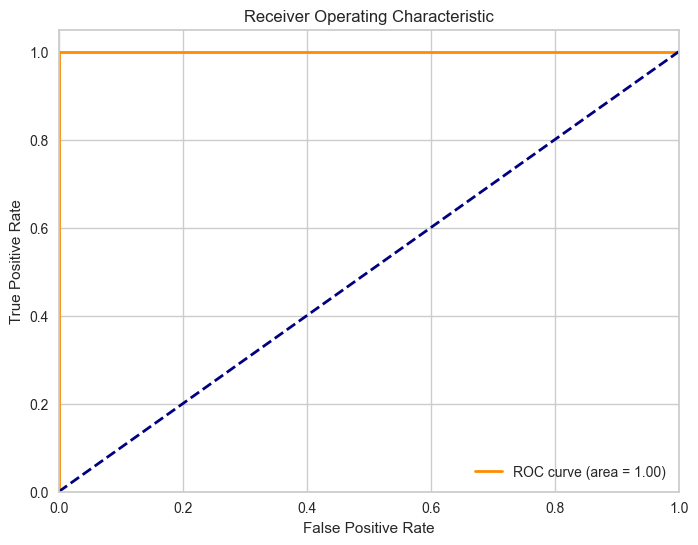

In [ ]:
evaluator.plot_roc_curve(model=best_models[best_model], X_test=X_test, y_test=y_test)

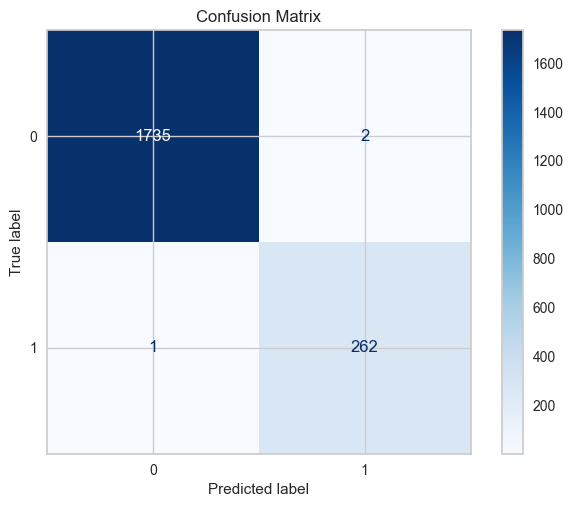

In [ ]:
evaluator.plot_confusion_matrix(
    model=best_models[best_model], X_test=X_test, y_test=y_test
)

In [ ]:
# predictions = best_models[best_model].predict(df_valid)

# output = pd.DataFrame({"index": df_valid.index, "y": predictions})

# output.head()